# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arif Fathurrahman
- **Email:** ariffathurrahman0@gmail.com
- **ID Dicoding:** arif_fathurrahman

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingaan peminjaman antara pelanggan casual dan member di setiap musim?
- Bagaimana arus naik-turun total peminjaman dari bulan ke bulan pada tahun 2011 dan 2012?
- Apakah suhu yang dirasakan pelanggan memengaruhi total peminjaman?
- Apakah kecepatan angin (tenang, berangin, angin kuat ) dapat mempengaruhi total peminjaman? (analisis lanjutan) 

## Import Semua Packages/Library yang Digunakan

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

library panda digunakan untuk data processing sedangkan matplotlib dan seaborn untuk visualisasi data

## Data Wrangling

### Gathering Data

In [175]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

import dataset dari file day.csv dan hour.csv

In [176]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


tampilkan 5 baris pertama dari dataframe hour_df

In [177]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


tampilkan 5 baris pertama dari dataframeday_df

**Insight:**
- terlihat seperti kedua data set tersebut adalah dataset yang hampir sama yaitu timeseries dataset. Namun dataset hour menampilkan aktivitas peminjaman / penyewaan sepeda tiap jam, sedangkan dataset menampilkan aktivitas serupa tiap hari. 
- Memiliki kolom data yang sama persis kecuali, dataset hour memiliki kolom hr(hour) sedangkan dataset day tidak

### Assessing Data

#### Data hour

In [178]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menampilan informasi dataframe hour_df

In [179]:
hour_df.isna().sum() 
#jumlah data kosong

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menampilkan jumlah data kosong masing masing kolom dataframe hour_df

In [180]:
print("jum data duplikat: ", hour_df.duplicated().sum())

jum data duplikat:  0


Menampilkan jumlah duplikat dataframe hour_df

In [181]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menampilkan statistik deskriptif dari kolom-kolom numerik pada dataframe hour_df

In [182]:
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1

batasBawah = Q1 - 1.5 * IQR
batasAtas = Q3 + 1.5 * IQR

outlier = hour_df[(day_df['casual'] < batasBawah) | (hour_df['casual'] > batasAtas)]

print(f"jumlah outlier: {outlier.shape[0]}")
print(outlier[['casual']])

jumlah outlier: 0
Empty DataFrame
Columns: [casual]
Index: []


Menampilan jumlah outlier dengan Interquartile Range (IQR) dan mmenampilkan nilai outlier pada kolom **casual** dari dataframe hour_df

In [183]:
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['registered'].quantile(0.75)
IQR = Q3 - Q1

batasBawah = Q1 - 1.5 * IQR
batasAtas = Q3 + 1.5 * IQR

outlier = hour_df[(day_df['registered'] < batasBawah) | (hour_df['registered'] > batasAtas)]

print(f"jumlah outlier: {outlier.shape[0]}")
print(outlier[['registered']])

jumlah outlier: 0
Empty DataFrame
Columns: [registered]
Index: []


Menampilan jumlah outlier dengan Interquartile Range (IQR) dan mmenampilkan nilai outlier pada kolom **registered** dari dataframe hour_df

#### Data day

In [184]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menampilan informasi dataframe day_df

In [185]:
day_df.isna().sum()
#jumlah data kosong

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menampilkan jumlah data kosong masing masing kolom dataframe hour_df

In [186]:
print("jum data duplikat: ", day_df.duplicated().sum())

jum data duplikat:  0


Menampilkan jumlah duplikat dataframe day_df

In [187]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menampilkan statistik deskriptif dari kolom-kolom numerik pada dataframe day_df

In [188]:
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)

IQR = Q3 - Q1

batasBawah = Q1 - 1.5 * IQR
batasAtas = Q3 + 1.5 * IQR

outlier = day_df[(day_df['casual'] < batasBawah) | (day_df['casual'] > batasAtas)]

print(f"jumlah outlier: {outlier.shape[0]}")
print(outlier[['casual']])

jumlah outlier: 44
     casual
148    2355
183    2282
184    3065
196    2418
246    2521
281    2397
441    3155
447    2469
455    2301
456    2347
462    3252
469    2795
470    2846
476    2541
490    2496
497    2622
504    3410
505    2704
511    2855
512    3283
513    2557
518    2795
519    2494
525    2708
532    2963
533    2634
539    2657
540    2551
550    2562
560    2355
568    2544
581    2345
595    2827
609    2352
610    2613
617    2570
623    3160
630    2512
631    2454
637    2589
644    3031
658    2806
665    2643
680    2290


Menampilan jumlah outlier dengan Interquartile Range (IQR) dan mmenampilkan nilai outlier pada kolom **casual** dari dataframe day_df

In [189]:
Q1 = day_df['registered'].quantile(0.25)
Q3 = day_df['registered'].quantile(0.75)

IQR = Q3 - Q1

batasBawah = Q1 - 1.5 * IQR
batasAtas = Q3 + 1.5 * IQR

outlier = day_df[(day_df['registered'] < batasBawah) | (day_df['registered'] > batasAtas)]

print(f"jumlah outlier: {outlier.shape[0]}")
print(outlier[['registered']])

jumlah outlier: 0
Empty DataFrame
Columns: [registered]
Index: []


Menampilan jumlah outlier dengan Interquartile Range (IQR) dan mmenampilkan nilai outlier pada kolom **registered** dari dataframe hour_df

**Insight:**
- data terlihat sudah hampir bersih sepenuhnya dari kedua dataframe : tidak ada data kosong dan data duplikat
- hanya data outlier yang muncul dari kedua dataset yaitu dataframe day pada kolom casual sejumlah 44 data

### Cleaning Data

**Imputation data outlier**

In [190]:
hour_df = hour_df.rename(columns={
    'instant': 'hour_id',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'holiday',
    'weekday': 'weekday',
    'workingday': 'working_day',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
    'windspeed': 'windspeed',
    'casual': 'casual',
    'registered': 'member',
    'cnt': 'count'
})
hour_df.head()

,hour_id,date,season,year,month,hour,holiday,weekday,working_day,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,member,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengganti nama kolom dalam dataframe hour_df agar lebih mudah dibaca

In [191]:
day_df = day_df.rename(columns={
    'instant': 'hour_id',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'holiday',
    'weekday': 'weekday',
    'workingday': 'working_day',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
    'windspeed': 'windspeed',
    'casual': 'casual',
    'registered': 'member',
    'cnt': 'count'
})
day_df.head()

,hour_id,date,season,year,month,holiday,weekday,working_day,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,member,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti nama kolom dalam dataframe day_df agar lebih mudah dibaca

In [192]:
hour_df['season'] = hour_df['season'].replace({
    1: 'Winter',
    2: 'Spring', 
    3: 'Summer', 
    4: 'Autumn' 
})
day_df['season'] = day_df['season'].replace({
    1: 'Winter', 
    2: 'Spring',
    3: 'Summer',
    4: 'Autumn' 
})

Mengganti nilai kolom season dalam dataframe hour_df agar lebih mudah dibaca

In [193]:
max_casual = day_df['casual'].max()
min_casual = day_df['casual'].min()

day_df['casual'] = day_df['casual'].apply(lambda x: max_casual if x > batasAtas else (min_casual if x < batasBawah else x))
day_df['count'] = day_df['casual'] + day_df['member'] #data outlier telah diubah sehingga count (casual + member) perlu diubah untuk menjaga data tetap akurat
day_df[day_df.casual == day_df.casual.max()]

,hour_id,date,season,year,month,holiday,weekday,working_day,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,member,count
504,505,2012-05-19,Spring,1,5,0,6,0,1,0.6,0.566908,0.45625,0.083975,3410,4884,8294


Mengubah nilai outlier casual menjadi nilai max/min tergantung dari nilainya serta mengganti nilai count karena nilai tersebut adalah hasil dari casual + member

In [194]:
hour_df.head()

,hour_id,date,season,year,month,hour,holiday,weekday,working_day,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,member,count
0,1,2011-01-01,Winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Melihat kembali dataframe hour_df setelah perubahan supaya sesuai dengan keinginan

In [195]:
day_df.head()

,hour_id,date,season,year,month,holiday,weekday,working_day,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,member,count
0,1,2011-01-01,Winter,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melihat kembali dataframe day_df setelah perubahan supaya sesuai dengan keinginan

# **Insight:**
- data outlier pada dataset day kolom casual telah diubah berdasarkan nilai max/min data tersebut untuk meningkatkan kualitas data
- nama kolom pada kedua dataset telah diubah supaya lebih mudah dimengerti
- nilai pada kolom season kedua dataset juga telah diubah menjadi nilai aslinya supaya lebih mudah dimengerti dan dianalisis

## Exploratory Data Analysis (EDA)

### Explore

In [196]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hour_id               731 non-null    int64  
 1   date                  731 non-null    object 
 2   season                731 non-null    object 
 3   year                  731 non-null    int64  
 4   month                 731 non-null    int64  
 5   holiday               731 non-null    int64  
 6   weekday               731 non-null    int64  
 7   working_day           731 non-null    int64  
 8   weather_situation     731 non-null    int64  
 9   temperature           731 non-null    float64
 10  apparent_temperature  731 non-null    float64
 11  humidity              731 non-null    float64
 12  windspeed             731 non-null    float64
 13  casual                731 non-null    int64  
 14  member                731 non-null    int64  
 15  count                 7

Cek kembali info dataframe day_df

In [197]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hour_id               17379 non-null  int64  
 1   date                  17379 non-null  object 
 2   season                17379 non-null  object 
 3   year                  17379 non-null  int64  
 4   month                 17379 non-null  int64  
 5   hour                  17379 non-null  int64  
 6   holiday               17379 non-null  int64  
 7   weekday               17379 non-null  int64  
 8   working_day           17379 non-null  int64  
 9   weather_situation     17379 non-null  int64  
 10  temperature           17379 non-null  float64
 11  apparent_temperature  17379 non-null  float64
 12  humidity              17379 non-null  float64
 13  windspeed             17379 non-null  float64
 14  casual                17379 non-null  int64  
 15  member             

Cek kembali info dataframe hour_df

In [198]:
data_df = hour_df.merge(day_df, on='date', how='left')

Menggabungkan kedua dataframe menggunakan left join menjadi data_df

In [199]:
data_df.head()

,hour_id_x,date,season_x,year_x,month_x,hour,holiday_x,weekday_x,working_day_x,weather_situation_x,...,weekday_y,working_day_y,weather_situation_y,temperature_y,apparent_temperature_y,humidity_y,windspeed_y,casual_y,member_y,count_y
0,1,2011-01-01,Winter,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Winter,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Winter,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Winter,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Winter,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Melihat isi dataframe data_df (dataset tergabung)

In [200]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour_id_x               17379 non-null  int64  
 1   date                    17379 non-null  object 
 2   season_x                17379 non-null  object 
 3   year_x                  17379 non-null  int64  
 4   month_x                 17379 non-null  int64  
 5   hour                    17379 non-null  int64  
 6   holiday_x               17379 non-null  int64  
 7   weekday_x               17379 non-null  int64  
 8   working_day_x           17379 non-null  int64  
 9   weather_situation_x     17379 non-null  int64  
 10  temperature_x           17379 non-null  float64
 11  apparent_temperature_x  17379 non-null  float64
 12  humidity_x              17379 non-null  float64
 13  windspeed_x             17379 non-null  float64
 14  casual_x                17379 non-null

Menampilkan info dataframe data_df

In [201]:
peminjaman_per_musim = data_df.groupby('season_x')[['casual_x', 'member_x', 'count_x']].sum().reset_index()

print(peminjaman_per_musim)

  season_x  casual_x  member_x  count_x
0   Autumn    129782    711831   841613
1   Spring    203522    715067   918589
2   Summer    226091    835038  1061129
3   Winter     60622    410726   471348


Menghitung total peminjaman per musim dengan groupby dari casual, member, dan jumlah pelanggan

In [202]:
data_0 = data_df[data_df['year_x'] == 0] #untuk tahun == 0 atau tahun 2011

data_per_bulan2011 = data_0.groupby('month_x').agg({
    'casual_x': 'sum',
    'member_x': 'sum',
    'count_x': 'sum' 
}).reset_index()

data_per_bulan2011['month_x'] = data_per_bulan2011['month_x'].apply(lambda x: pd.to_datetime(f'2021-{x}-01').strftime('%B'))

print(data_per_bulan2011)

      month_x  casual_x  member_x  count_x
0     January      3073     35116    38189
1    February      6242     41973    48215
2       March     12826     51219    64045
3       April     22346     72524    94870
4         May     31050    104771   135821
5        June     30612    112900   143512
6        July     36452    104889   141341
7      August     28842    107849   136691
8   September     26545    100873   127418
9     October     25222     98289   123511
10   November     15594     86573   102167
11   December      8448     78875    87323


Menghitung total peminjaman per bulan 2011 dengan groupby dari casual, member, dan jumlah pelanggan

In [203]:
data_1 = data_df[data_df['year_x'] == 1] #untuk tahun == 1 atau tahun 2012

data_per_bulan2012 = data_1.groupby('month_x').agg({
    'casual_x': 'sum',
    'member_x': 'sum',
    'count_x': 'sum' 
}).reset_index()

data_per_bulan2012['month_x'] = data_per_bulan2012['month_x'].apply(lambda x: pd.to_datetime(f'2021-{x}-01').strftime('%B'))

print(data_per_bulan2012)

      month_x  casual_x  member_x  count_x
0     January      8969     87775    96744
1    February      8721     94416   103137
2       March     31618    133257   164875
3       April     38456    135768   174224
4         May     44235    151630   195865
5        June     43294    159536   202830
6        July     41705    161902   203607
7      August     43197    171306   214503
8   September     43778    174795   218573
9     October     34538    164303   198841
10   November     21009    131655   152664
11   December     13245    110468   123713


Menghitung total peminjaman per bulan 2012 dengan groupby dari casual, member, dan jumlah pelanggan

In [204]:
korelasi = data_df['apparent_temperature_y'].corr(data_df['count_y'])

print(f'Nilai korelasi antara apparent_temperature dan count berdasarkan hari: {korelasi:.2f}')

Nilai korelasi antara apparent_temperature dan count berdasarkan hari: 0.63


Mengetahui nilai korelasi antara apparent temp dengan jumlah pelanggan 

In [205]:
def windspeed_clustering(windspeed):
    if windspeed <= 0.17:
        return 'Tenang'
    elif 0.17 < windspeed <= 0.34:
        return 'Berangin'
    else:
        return 'Angin Kencang'

data_df['windspeed_category'] = data_df['windspeed_y'].apply(windspeed_clustering)
data_df[['windspeed_y', 'windspeed_category', 'count_y']].head() 

,windspeed_y,windspeed_category,count_y
0,0.160446,Tenang,985
1,0.160446,Tenang,985
2,0.160446,Tenang,985
3,0.160446,Tenang,985
4,0.160446,Tenang,985


Melakukan manual clustering kecepatan angin dengan jumlah pelanggan

**Insight:**
- Menampilkan jumlah peminjaman permusim baik itu pelanggan kasual, member, ataupun total dari kedua data
- Menampilkan data jumlah peminjaman setiap bulannya baik itu dari pelanggan kasual, member, ataupu totao kedua data
- Nilai korelasi = 0,63 menunjukkan bahwa semakin tinggi suhu yang dirasakan, cenderung semakin tinggi pula jumlah peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingaan peminjaman antara pelanggan casual dan member di setiap musim?

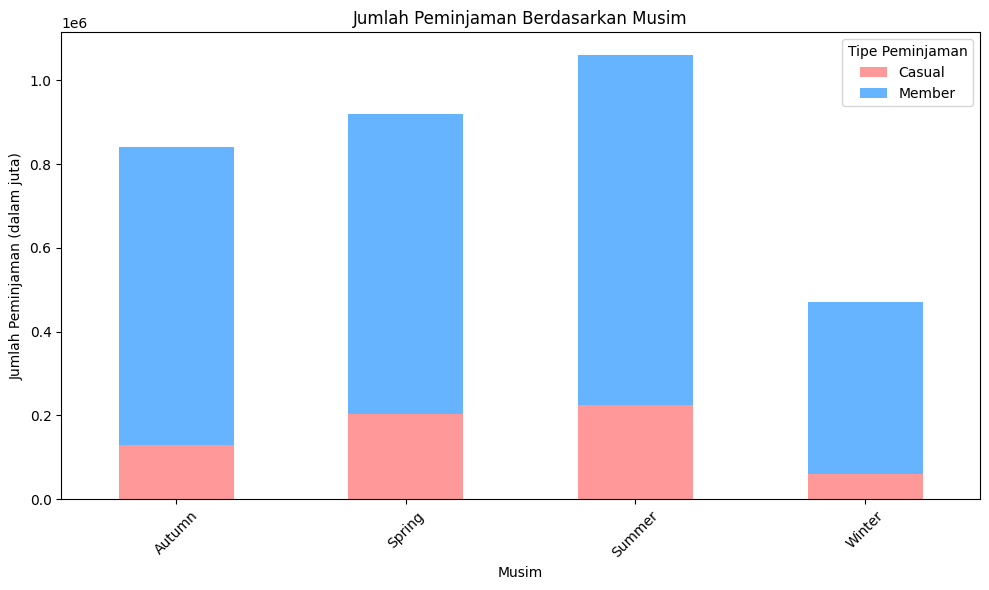

In [214]:
peminjaman_per_musim = data_df.groupby('season_x')[['casual_x', 'member_x']].sum().reset_index()
colors = ['#FF9999', '#66B3FF'] 
peminjaman_per_musim.set_index('season_x').plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.title('Jumlah Peminjaman Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman (dalam juta)')
plt.legend(title='Tipe Peminjaman', labels=['Casual', 'Member'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Membuat visualisasi grafis dari jumlah peminjaman berdasarkan musim menggunakan diagram batang bertumpuk
- Grafik menunjukan dominasi antara peminjam member serta kenaikan jumlah peminjaman di cuaca yang hangat-panas

### Pertanyaan 2: Bagaimana arus naik-turun total peminjaman dari bulan ke bulan pada tahun 2011 dan 2012?

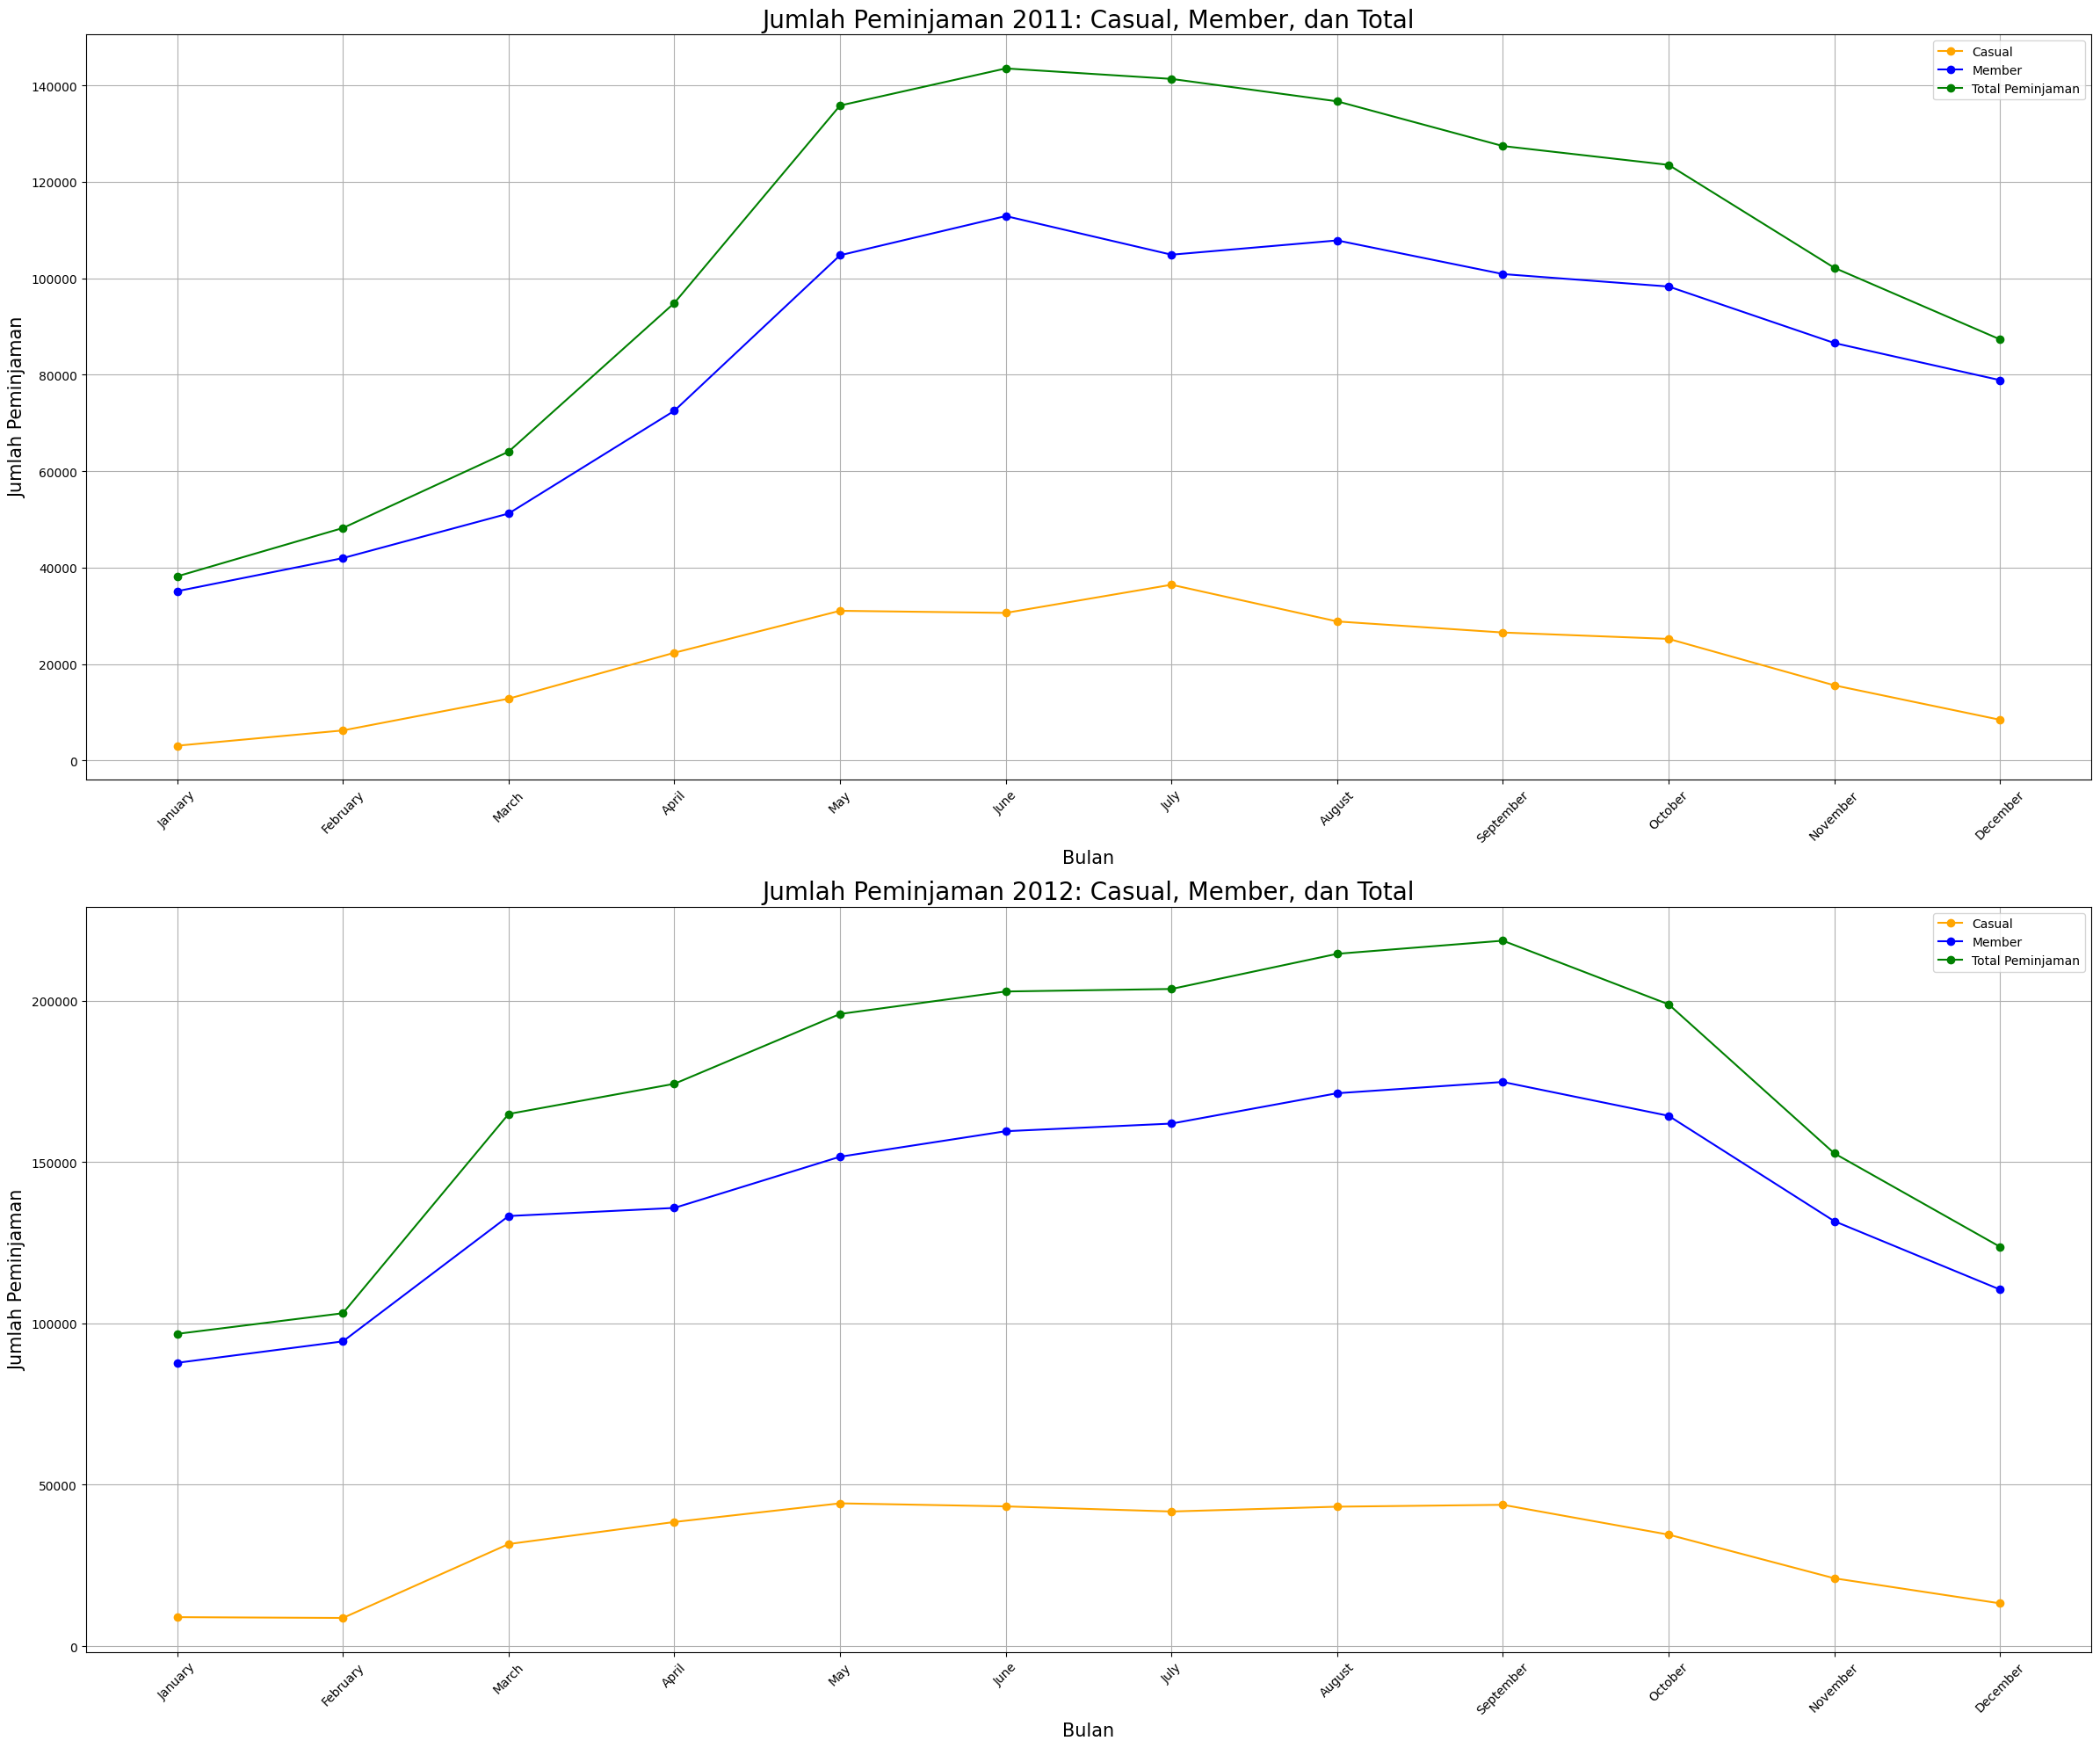

In [207]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(24, 20))

# Plot untuk data tahun 2011
ax[0].plot(data_per_bulan2011['month_x'], data_per_bulan2011['casual_x'], label='Casual', marker='o', color='orange')
ax[0].plot(data_per_bulan2011['month_x'], data_per_bulan2011['member_x'], label='Member', marker='o', color='blue')
ax[0].plot(data_per_bulan2011['month_x'], data_per_bulan2011['count_x'], label='Total Peminjaman', marker='o', color='green')

ax[0].set_title('Jumlah Peminjaman 2011: Casual, Member, dan Total', size=20)
ax[0].set_xlabel('Bulan', size=15)
ax[0].set_ylabel('Jumlah Peminjaman', size=15)

ax[0].set_xticks(range(len(data_per_bulan2011['month_x'])))  # Menetapkan lokasi ticks
ax[0].set_xticklabels(data_per_bulan2011['month_x'], rotation=45)

ax[0].legend()
ax[0].grid(True)

# Plot untuk data tahun 2012
ax[1].plot(data_per_bulan2012['month_x'], data_per_bulan2012['casual_x'], label='Casual', marker='o', color='orange')
ax[1].plot(data_per_bulan2012['month_x'], data_per_bulan2012['member_x'], label='Member', marker='o', color='blue')
ax[1].plot(data_per_bulan2012['month_x'], data_per_bulan2012['count_x'], label='Total Peminjaman', marker='o', color='green')

ax[1].set_title('Jumlah Peminjaman 2012: Casual, Member, dan Total', size=20)
ax[1].set_xlabel('Bulan', size=15)
ax[1].set_ylabel('Jumlah Peminjaman', size=15)

ax[1].set_xticks(range(len(data_per_bulan2012['month_x'])))  # Menetapkan lokasi ticks
ax[1].set_xticklabels(data_per_bulan2012['month_x'], rotation=45)

ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


- Membuat visualisasi jumlah peminjaman berdasarkan tipe pelanggan (casual dan member) serta jumlah peminjaman untuk tahun 2011 dan 2012 menggunakan subplots
- pada 2011 total peminjaman mengalami kenaikan terus-menerus dari januari-juni lalu disusul dengan penurunan di bulan setelahnya
- pada 2012 fenomena yang serupa terjadi namun kali ini kenaikan memuncak pada bulan september disusul dengan penurunan di bulan setelahnya

### Pertanyaan 3: Apakah suhu yang dirasakan pelanggan memengaruhi total peminjaman?

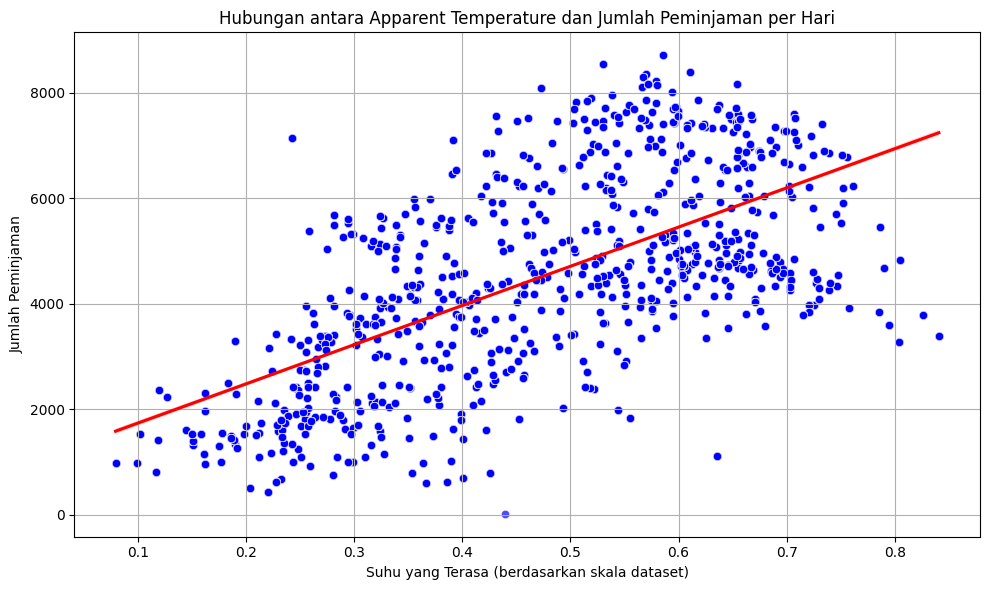

In [215]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=data_df, x='apparent_temperature_y', y='count_y', color='blue', alpha=0.7)

sns.regplot(data=data_df, x='apparent_temperature_y', y='count_y', scatter=False, color='red')

plt.title('Hubungan antara Apparent Temperature dan Jumlah Peminjaman per Hari')
plt.xlabel('Suhu yang Terasa (berdasarkan skala dataset)')
plt.ylabel('Jumlah Peminjaman')
plt.grid()

plt.tight_layout()
plt.show()

- Membuat visualisasi hubungan antara suhu yang terasa (apparent temperature) dan jumlah peminjaman per hari dengan scatter plot
- Jumlah peminjaman nampak cenderung meningkat seiring meningkatnya suhu (semakin hangat semakin banyak peminjaman)

**Insight:**
- Diagram batang bertumpuk digunakan supaya pembaca dapat dengan mudah memperoleh insight dari visual yang diberikan
- Penggunaan line chart dapat dengan mudah memperoleh insight tentang kenaikan atau penurunan layanan yang diberikan pada pelanggan
- Penggunaan scatter plot dapat memberi gambaran tentang persebaran data antara hubungan apparent temperature dan jumlah peminjaman

## Analisis Lanjutan (Opsional) : Apakah kecepatan angin (tenang, berangin, angin kuat ) dapat mempengaruhi total peminjaman?

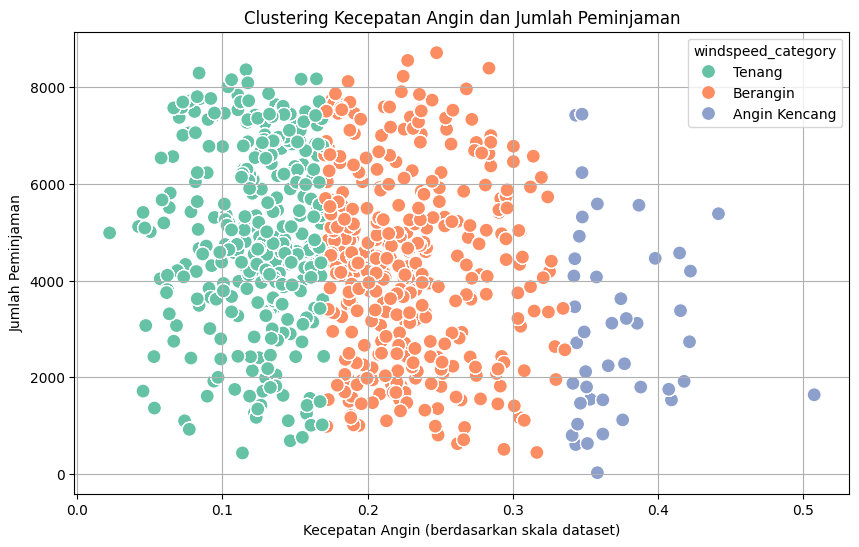

In [209]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='windspeed_y', y='count_y', hue='windspeed_category', palette='Set2', s=100)
plt.title('Clustering Kecepatan Angin dan Jumlah Peminjaman')
plt.xlabel('Kecepatan Angin (berdasarkan skala dataset)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

- Membuat visualisasi hubungan antara kecepatan angin dan jumlah peminjaman per hari dengan scatter plot serta pemberian kategori angin sebagai clustering
- Persebaran data cenderung memadat di kecepatan angin pada kategori tenang-berangin, yang berarti pelanggan cenderung menyukai hembusan angin dengan intensitas rendah dan menghindari peminjaman pada angin kencang

## Conclusion

- Jumlah Peminjaman Berdasarkan Musim
  
    Menunjukkan bahwa peminjam member mendominasi jumlah peminjaman sepeda dibandingkan peminjam kasual. Hal ini mengindikasikan bahwa member cenderung lebih sering menggunakan layanan ini.

    Selain itu, musim panas (summer season) mencatat jumlah peminjaman tertinggi. Cuaca yang baik dan kegiatan luar ruangan selama musim ini mungkin menjadi faktor utama peningkatan peminjaman, serta menarik lebih banyak orang untuk bersepeda.
- Arus naik-turun total peminjaman dari bulan ke bulan pada tahun 2011 dan 2012

    Pada tahun pertama (2011), total peminjaman sepeda meningkat dari awal tahun hingga Mei, namun mulai menurun dari bulan Agustus hingga akhir tahun. Penurunan ini mungkin dipicu oleh perubahan musim dan aktivitas masyarakat yang berkurang.

    Pada tahun kedua (2012), pola serupa terlihat dengan kenaikan peminjaman hingga September, diikuti oleh penurunan di bulan-bulan setelahnya.

    Tidak ada perbedaan signifikan dalam pola antara peminjaman casual dan member; keduanya menunjukkan tren yang hampir identik, dengan kenaikan awal tahun dan penurunan setelahnya.
- Pengaruh suhu yang terasa dan total peminjaman

    Menunjukkan bahwa peningkatan suhu berhubungan dengan peningkatan jumlah peminjaman. Terdapat korelasi positif yang cukup signifikan dimana semakin tinggi suhu, semakin tinggi jumlah peminjaman sepeda. Ini menunjukkan bahwa peminjaman cenderung meningkat pada hari yang lebih hangat.

- Pengaruh kecepatan angin dengan jumlah peminjaman

    Berdasarkan visualisasi persebaran data cenderung memadat pada kategori "Tenang" hingga "Berangin", ini menunjukkan bahwa jumlah peminjaman lebih banyak terjadi ketika kecepatan angin rendah atau sepoi-sepoi. Pada kondisi angin tersebut pengguna cenderung merasa lebih nyaman untuk bersepeda, yang berkontribusi pada tingginya jumlah peminjaman berulang. Sementara itu, saat kecepatan angin meningkat ke kategori "Angin Kencang," peminjaman berulang cenderung lebih sedikit, kemungkinan disebabkan oleh faktor ketidaknyamanan atau rasa tidak aman ketika bersepeda dalam kondisi cuaca yang lebih ekstrem. Hal ini dapat menunjukkan hubungan negatif antara kecepatan angin yang tinggi dan aktivitas peminjaman sepeda.
    

## Ekstrak dataset yang sudah rapi dan tambahan berisi kolom baru (cluster) ke main_data.csv

In [210]:
data_df.to_csv("main_data.csv", index=False)